In [ ]:
# 연속형 데이터의 값의 크기 차이에 따른 분포를 확인할 대 히스토그램과 커널 밀도 함수를 이용한 커널 밀도 그래프를 주로 사용
# Seaborn 라이브러리는 히스토그램에는 hisplot, 커널 밀도 그래프를 그릴 때는 kdelot을 사용

# 히스토그램은 데이터를 일정한 간격의 구간으로 나누고 각 구간에 속하는 데이터의 빈도 수를 막대로 표현한 그래프
# 데이터의 중심 경향성, 퍼짐 정도(변동성), 이상치, 분포의 모양 등을 대략적으로 파악할 수 있음
# 

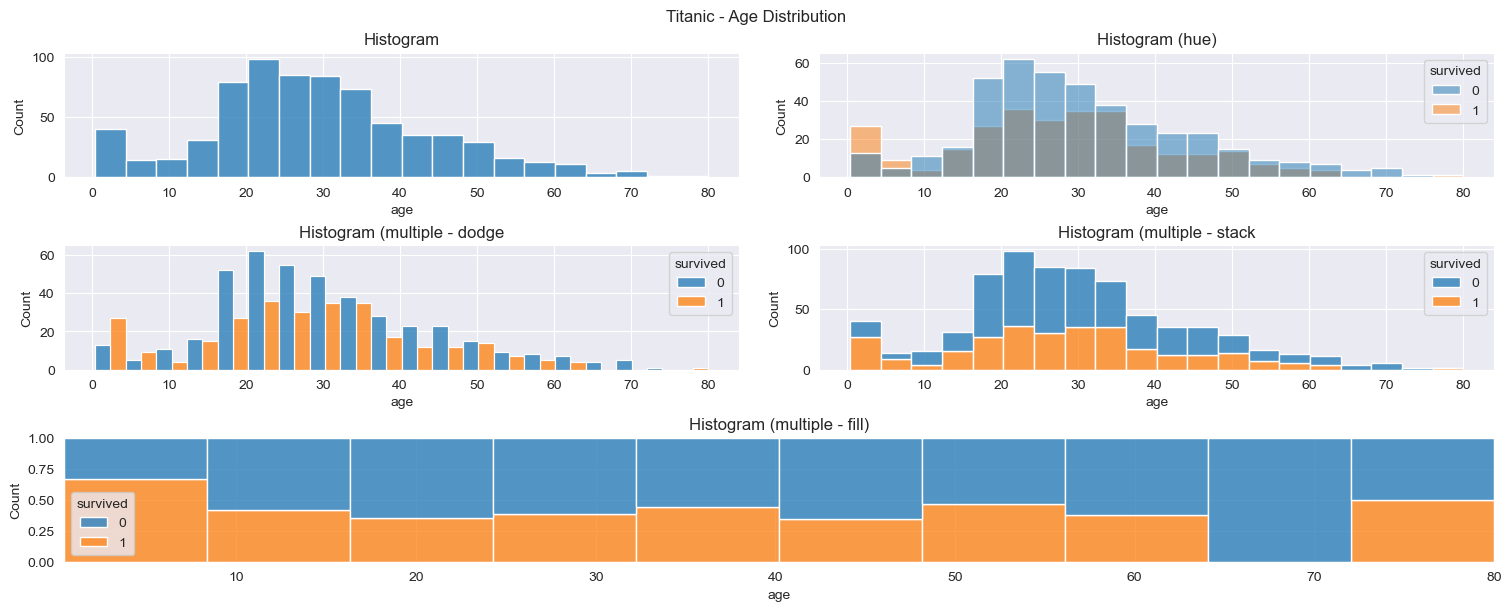

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯을 생성)
fig, axes = plt.subplot_mosaic([['top_left','top_right'],
                                 ['middle_left', 'middle_right'],
                                 ['bottom', 'bottom']], # figure 객체 내에 4개의 Axes를 배치
                                  figsize = (15,6),
                                  constrained_layout = True)

# histplot 
sns.histplot(x = 'age', data = titanic, ax = axes['top_left'])

# histplot - hue 옵션 추가
sns.histplot(x = 'age', hue = 'survived', data = titanic, ax = axes['top_right'])
# 생존여부에 따른 나이 분포의 차이를 상단 오른쪽에 표시
# 즉 나이대에서 생존한 사람과 사망한 사람의 수르 서로 다른 색으로 구분하여 보여준다

# histplot - multiple(dodge) 적용  , 생존 두 그룹의 막대를 나란히 배치하여 서로 겹치지 않게 표시, 
# 각 그룹의 생존 나이 분포를 명확히 구분해주어 비교하기 쉽게 만듬
sns.histplot(x = 'age', hue = 'survived', multiple = 'dodge', data = titanic, ax = axes['middle_left'])

# histplot - multiple(stack) 적용 
sns.histplot(x = 'age', hue = 'survived', multiple = 'stack', data = titanic, ax = axes['middle_right'])
# 하나의 막대 위에 다른 막대를 쌓아서 표시, 전체 분포의 모양을 유지하면서도 각 그룹의 비율을 쉽게 비교할 수 있다

# histplot - multiple(fill) 적용 
sns.histplot(x = 'age', hue = 'survived', multiple = 'fill', bins = 10, data = titanic, ax = axes['bottom'])
# 막대를 위아래로 쌓아서 표시를 하지만 전체 높이를 1로 정규화하여 상대적인 비율로 표시
# 각 구간에서 그룹의 비율을 비교하는데 유용
# bins = 10 나이 데이터를 10개의 구간으로 나누어 표시하라는 의미

# Figure 객체 제목 표시
fig.suptitle('Titanic - Age Distribution')

# Axes 객체 제목 표시
axes['top_left'].set_title('Histogram')
axes['top_right'].set_title('Histogram (hue)')
axes['middle_left'].set_title('Histogram (multiple - dodge')
axes['middle_right'].set_title('Histogram (multiple - stack')
axes['bottom'].set_title('Histogram (multiple - fill)')

plt.show()

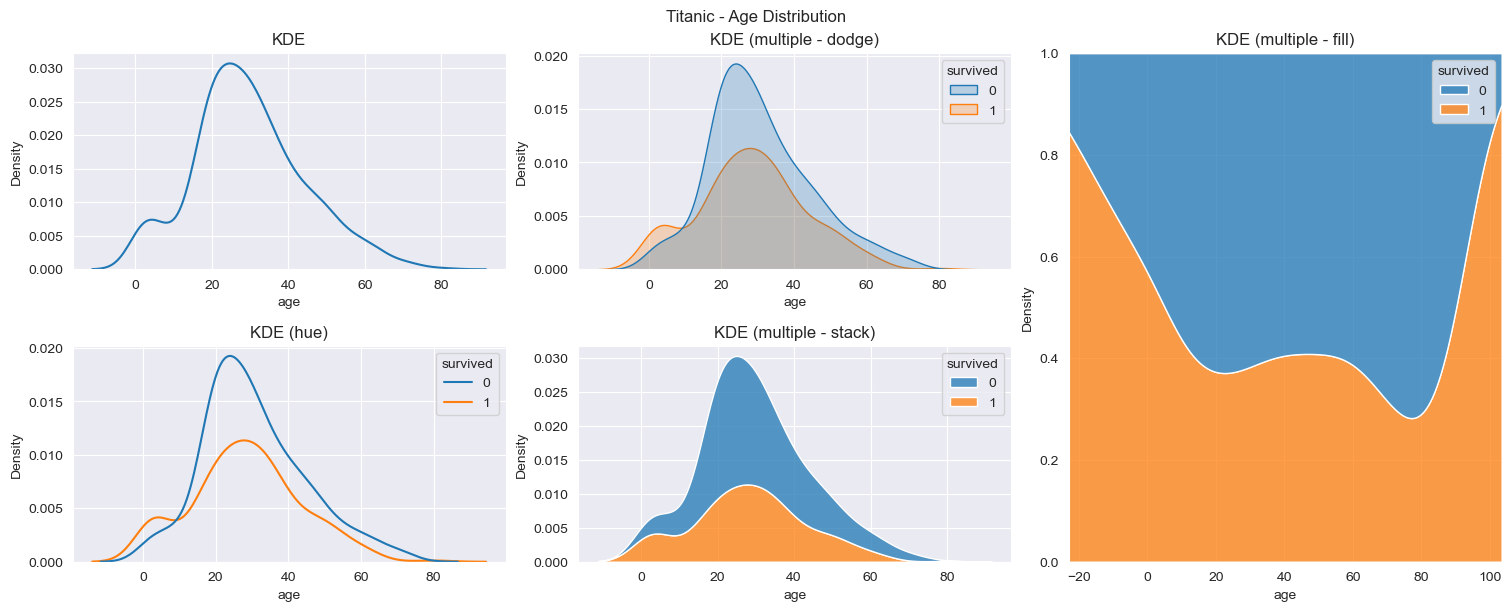

In [37]:
# 커널 밀도 그래프임 KDE플롯은 주어진 데이터 포인트를 매끄러운 연속 확률 분포로 나타냄
# 데이터의 확률 밀도 함수를 추정하는 비모수적인 방법인 커널 밀도 추정을 이용한다
# 이를 통해 데이터 포인트가 나타내는 분포의 모양을 부드러운 곡선으로 그린다

fig, axes = plt.subplot_mosaic([['top_left','top_center', 'right'],
                                 ['bottom_left', 'bottom_center', 'right']],
                                  figsize = (15,6),
                                  constrained_layout = True)

# histplot 
sns.kdeplot(x = 'age', data = titanic, ax = axes['top_left'])

# histplot - hue 옵션 추가
sns.kdeplot(x = 'age', hue = 'survived', data = titanic, ax = axes['bottom_left'])

sns.kdeplot(x = 'age', hue = 'survived', fill = True, data = titanic, ax = axes['top_center'])
# fill = True 매개 변수를 추가하여 KDE 곡선 아래 영역을 채워서 표시

# histplot - multiple(stack) 적용 
sns.kdeplot(x = 'age', hue = 'survived', multiple = 'stack', data = titanic, 
            ax = axes['bottom_center'])
# survived 카테고리별 KDE 플롯을 서로 겹치지 않게 위아래로 쌓아서 그린다

# histplot - multiple(fill) 적용 
sns.kdeplot(x = 'age', hue = 'survived', multiple = 'fill', bw_adjust = 2.0,
            data = titanic, ax = axes['right'])
# survived 카테고리의 상대적인 구성비율을 총합이 1이 되도록 표현
# bw_adjust는 KDE 곡선의 부드러움을 제어하는 대역폭을 결정한다. 값이 클수록 곡선은 더 부드럽게 표현됨

# Figure 객체 제목 표시
fig.suptitle('Titanic - Age Distribution')

# Axes 객체 제목 표시
axes['top_left'].set_title('KDE')
axes['bottom_left'].set_title('KDE (hue)')
axes['top_center'].set_title('KDE (multiple - dodge)')
axes['bottom_center'].set_title('KDE (multiple - stack)')
axes['right'].set_title('KDE (multiple - fill)')

plt.show()

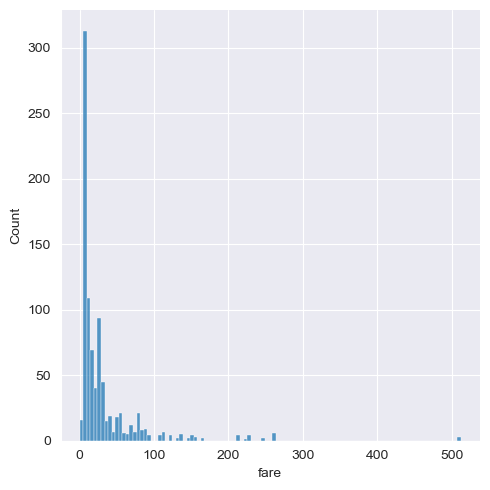

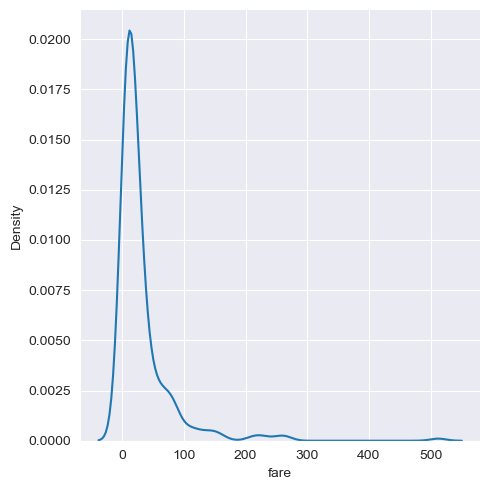

In [41]:
# displot(figure객체 생성)
# 히스토그램과 커널 밀도 그래프를 모두 구현함

sns.displot(titanic['fare'], kind = 'hist')
plt.show()

sns.displot(titanic['fare'], kind = 'kde')
plt.show()

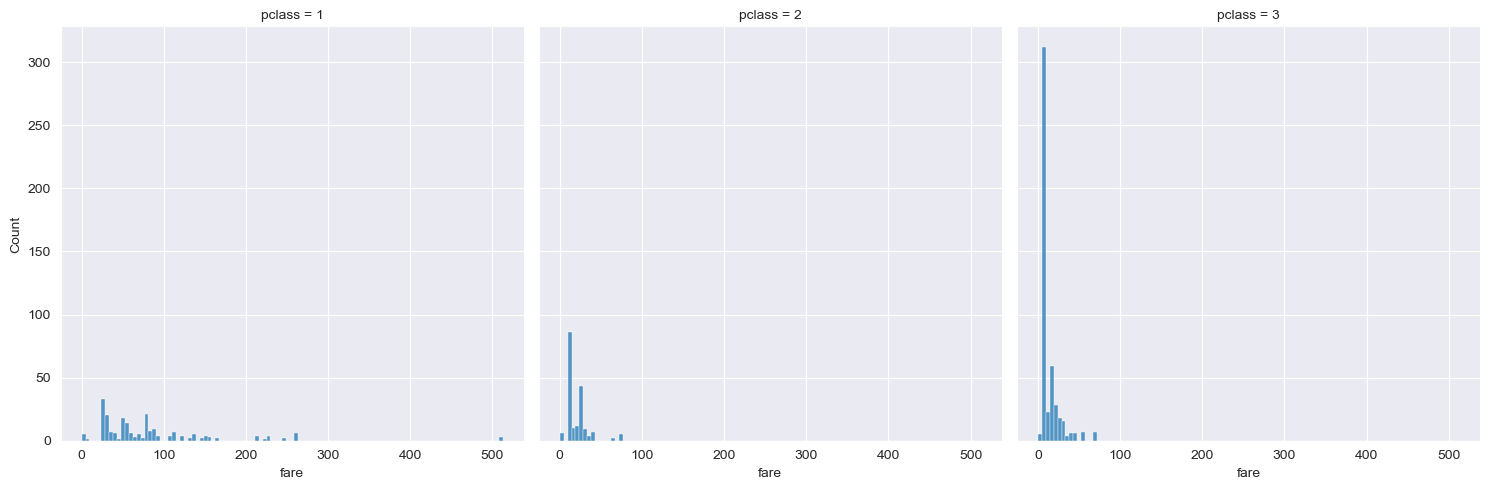

In [45]:
sns.displot(data = titanic, x = 'fare', col = 'pclass', kind = 'hist')
plt.show() # pclass 1등석 first class, 2등석 second class, 3등석 third class

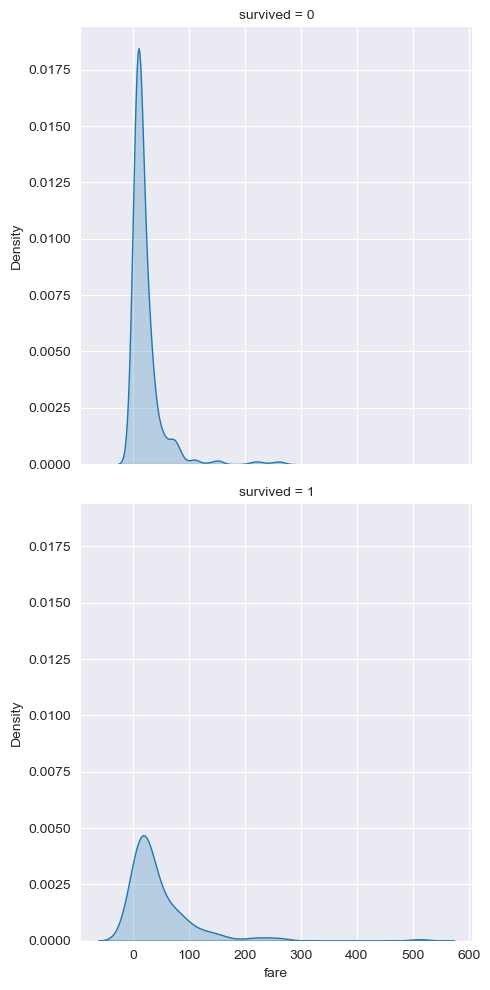

In [51]:
sns.displot(data = titanic, x = 'fare', row = 'survived', kind = 'kde', fill=True)
plt.show()

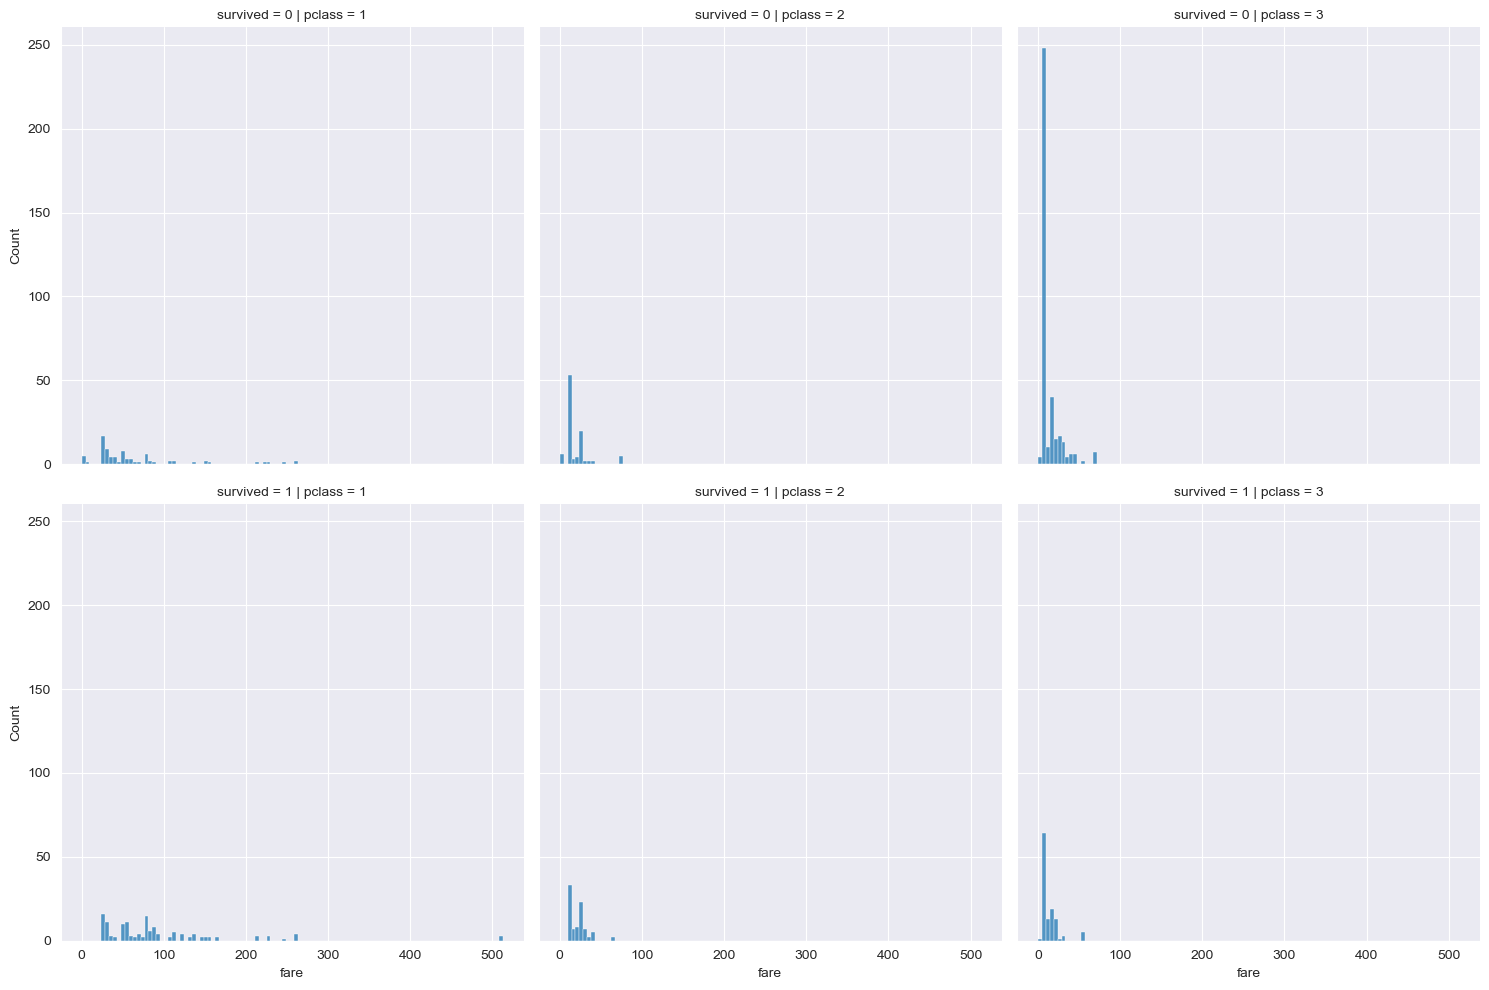

In [53]:
# col = pclass, row = survived 옵션을 모두 적용
sns.displot(data = titanic, x = 'fare', col = 'pclass', row = 'survived')
plt.show()

In [55]:
# 등고선 차트/ 2D 히스토그램

In [59]:
# Seaborn의 커널 밀도 그래프(커널 밀도 추정, KDE)를 2개의 변수에 대해서 적용하면 등고선 형태로 두 변수 간의 밀도 분포를 표시
# 데이터 포인트들의 공간상에서 분포를 시각화 하는 방법
# 등고선의 고도가 높을수록 데이터가 밀집, 서로 다른 등고선 사이의 거리는 밀도의 변화를 나타냄

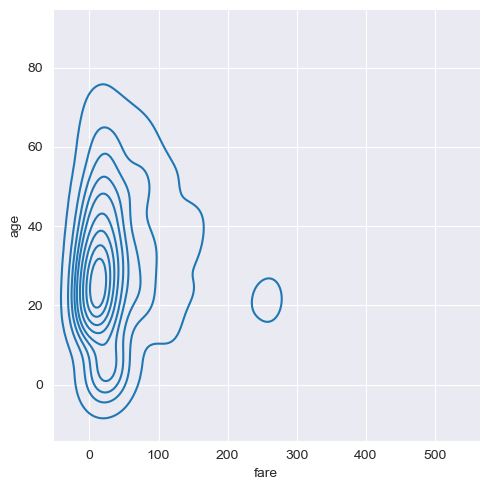

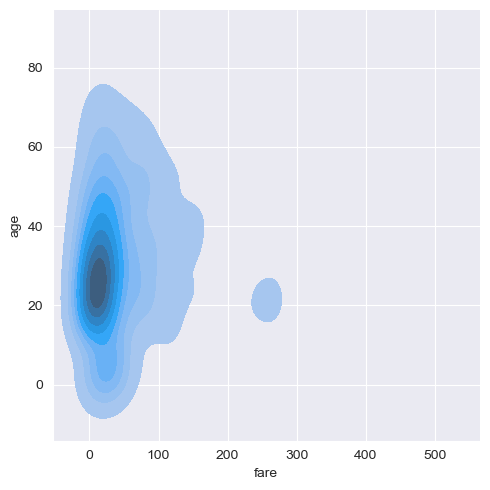

In [61]:
# 등고선 차트
sns.displot(x = 'fare', y = 'age', data = titanic, kind = 'kde')
plt.show()

sns.displot(x = 'fare', y = 'age', data = titanic, kind = 'kde', fill = True)
plt.show()

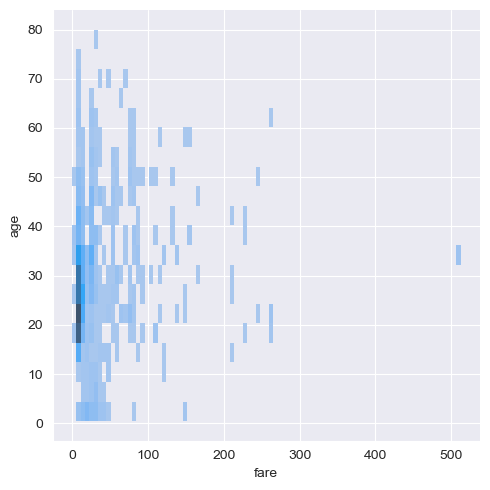

In [63]:
# 2D 히스토그램
sns.displot(x = 'fare', y = 'age', data = titanic, kind = 'hist')
plt.show()